# This is a tutorial on how to use Pytorch for a simple regression task.
If you have any questions, reach Peihua Han in B430
- We will use a simple feed-forward neural network for the regression task. 
- The benchmark function is $y=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(20x)$.
## Build a model in Pytorch usually contains the following steps: 
1. Prepare the data
2. Define the model
3. Train the model
4. Evaluate the model

In [1]:
# import necessary library
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

## Step 1: Prepare the data
The train and test data will be generated from $y=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(20x)$. 

## 1.1 Generate data from the benchmark function
the input $x$ is a 2D matrix (n_samples, n_inputs), the output $y$ is a 2D matrix (n_samples, n_inputs).

In [2]:
f = lambda x: 0.2 + 0.4*x**2 + 0.3*x*np.sin(15*x) + 0.05*np.cos(20*x)
xgrid = np.linspace(0., 1., 640)
xgrid = np.expand_dims(xgrid, axis=1)  # x values
fgrid = f(xgrid)  # y values
ygrid = fgrid + 0.02*np.random.normal(size=(640, 1))  # y values with noise

In [3]:
print('input shape: ', xgrid.shape, 'output shape: ', ygrid.shape)

input shape:  (640, 1) output shape:  (640, 1)


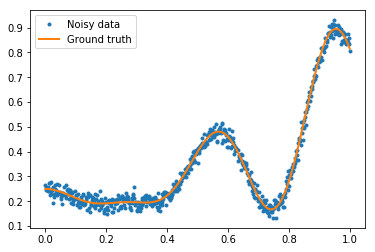

In [4]:
plt.plot(xgrid, ygrid, '.', label='Noisy data')
plt.plot(xgrid, fgrid, lw=2, label='Ground truth')
plt.legend()

### 1.2 put data into pytorch dataloader
Note that we use noisy data for training instead of the ground truth

In [5]:
df_train = TensorDataset(torch.FloatTensor(xgrid), torch.FloatTensor(ygrid))
train_loader = DataLoader(df_train, batch_size=32, shuffle=True)

## Step 2: Define the model

### 2.1 build model using torch.nn class
We define a simple neural network model with 2 hidden layers.

In [6]:
class MLP(nn.Module):
    # define model elements
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(1, 64)   # input_size=1 (equals to n_input), hidden_size=64
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 1)  # map 64 hidden state to 1
        self.relu = nn.ReLU()

    # forward propagate input
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### 2.2 Instantiate the model

In [7]:
model = MLP()

### 2.3 Define loss function and optimizer

we use [mean square loss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) for regression and [ADAM](https://arxiv.org/abs/1412.6980) optimizer for optimizing the weights of our neural network.

In [8]:
criterion = nn.MSELoss()  # mean square loss
optimizer = Adam(model.parameters(), lr=1e-2)  # Instantiate a optimizer, learning_rate=0.01.

## Step 3: Train the model
- Training the model usually involves 2 loops. 
- The 1st loop is a loop through the dataset, which is expressed as the epoch. 3 epochs mean that the model has gone through the whole training dataset 3 times.
- The 2nd loop is a loop throgh the batch (see how dataloader split the dataset into multiple batches, each batch contains 32 samples in our case).

In [9]:
'''Training'''
model.train()  # set the model in training mode
for epoch in range(40):   # loop throgh the whole dataset (1st loop)
    train_loss = 0
    for i, (x, y) in enumerate(train_loader):  # loop through the batch (2nd loop)
        # clear the gradients
        optimizer.zero_grad()
        # forward pass (get the prediction from our model)
        y_pred = model(x)
        
        # calculate the cross-entropy loss from prediction y_pred and true label y
        loss = criterion(y_pred, y)
        # backpropagate the error (pytorch automatically calculate the gradients for each weights in our model HARNET)
        loss.backward()
        # update model weights (use ADAM optimizer to update the weights in our model)
        optimizer.step()
        # only use to record the training loss
        train_loss += loss.item() * x.shape[0]
    # recorded training loss in each epoch and print it
    train_loss /= len(train_loader.dataset)
    print('Train Epoch: {}/40, Train Loss: {}'.format(epoch + 1, train_loss))

Train Epoch: 1/40, Train Loss: 0.049048818834126
Train Epoch: 2/40, Train Loss: 0.019430404622107746
Train Epoch: 3/40, Train Loss: 0.01567930169403553
Train Epoch: 4/40, Train Loss: 0.013755379989743233
Train Epoch: 5/40, Train Loss: 0.010915479017421603
Train Epoch: 6/40, Train Loss: 0.009049196005798876
Train Epoch: 7/40, Train Loss: 0.008206495293416083
Train Epoch: 8/40, Train Loss: 0.007820514729246497
Train Epoch: 9/40, Train Loss: 0.008212763187475502
Train Epoch: 10/40, Train Loss: 0.008516189851798117
Train Epoch: 11/40, Train Loss: 0.007746469206176698
Train Epoch: 12/40, Train Loss: 0.007546776882372796
Train Epoch: 13/40, Train Loss: 0.008503215899690986
Train Epoch: 14/40, Train Loss: 0.0071014875778928396
Train Epoch: 15/40, Train Loss: 0.007044844690244645
Train Epoch: 16/40, Train Loss: 0.00662881569005549
Train Epoch: 17/40, Train Loss: 0.006640295730903745
Train Epoch: 18/40, Train Loss: 0.008168418984860181
Train Epoch: 19/40, Train Loss: 0.005498489702586084
Train 

## Step 4: Evaluate the model

In [10]:
# get model predictions
model.eval()
with torch.no_grad():
    y_pred = model(torch.FloatTensor(xgrid))
    y_pred = y_pred.numpy()

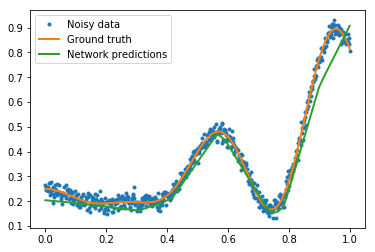

In [11]:
plt.plot(xgrid, ygrid, '.', label='Noisy data')
plt.plot(xgrid, fgrid, lw=2, label='Ground truth')
plt.plot(xgrid, y_pred, lw=2, label='Network predictions')
plt.legend()